# 정보처리연습 기말 보고서 코드 - 유혜영 (2016195045)

# Step 4. Data Analysis 

- K-Nearest Neighbors Classification
- Gaussian Naive Bayes Classification
- Random Forest Classification

## Step 1. Setting X and y from dataframe

In [102]:
# Import necessary module to handle the dataframe
import pandas as pd

# Read the preprocessed_df.tsv file
df = pd.read_csv('/Users/angieryu2202/Desktop/preprocessed_df.tsv', sep ="\t")

# Check if the data has been read properly
df.head(5)

,Unnamed: 0,review_numbers,review_scores,review_weekdays,sentiment_compound,company_name
0,0,1,1,1,1,expedia
1,1,1,1,3,1,expedia
2,2,1,1,3,0,expedia
3,3,1,1,0,0,expedia
4,4,2,3,0,0,expedia


In [103]:
# Take out the unnecessary "Unnamed: 0" column
df1 = df.iloc[:, 1:6]
# Check if the column has been taken out properly
df1.head(5)

,review_numbers,review_scores,review_weekdays,sentiment_compound,company_name
0,1,1,1,1,expedia
1,1,1,3,1,expedia
2,1,1,3,0,expedia
3,1,1,0,0,expedia
4,2,3,0,0,expedia


In [104]:
# Check if shape of data
df1.shape

(10680, 5)

In [105]:
# Set X and y from the dataframe
import numpy as np
feature_names = [i for i in df1.columns if df1[i].dtype in [np.int64]]
X = df1[feature_names]
y = df1.iloc[:, -1].values

## Step 2. Creating Training and Test Set 

In [106]:
# Divide the dataset into training set and testing set
# Test set size is 0.3
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

In [107]:
# Feature Scaling is needed since the review_numbers data has a significantly wider range than other columns
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)

X_train1 = scaler.transform(X_train)  
X_test1 = scaler.transform(X_test)  

## Step 3. Implementing Machine Learning Algorithms 

### 1. kNN

kvalues       19.00000
accuracies     0.50593
Name: 18, dtype: float64

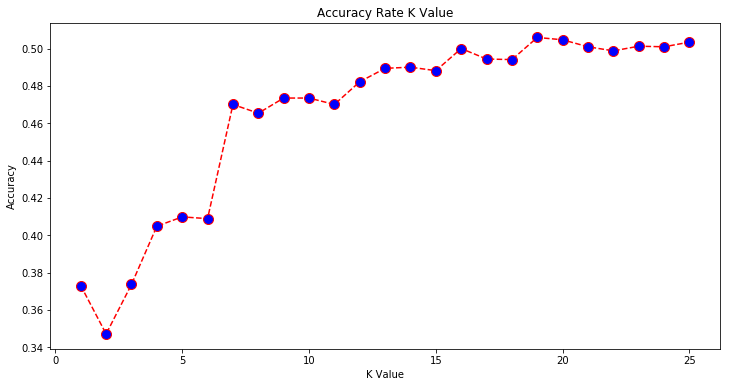

In [108]:
# Import necessary modules for finding k value with the highest accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Make empty dictionary for accuracies and k values
k_detector = {}

# Make empty lists for the values of accuracies and kvalues
accuracies = []
kvalues = []

# For k values from 1 to 25, find the accuracy of each value
for i in range(1,26):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train1, y_train)
    y_test_pred = classifier.predict(X_test1)
    accuracy = accuracy_score(y_test,y_test_pred)
    accuracies.append(accuracy)
    kvalues.append(i)

# Append the lists as values to the keys of kvalues and accuracies
k_detector['kvalues'] = kvalues
k_detector['accuracies'] = accuracies

# Plot the accuracy plot
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 26), accuracies, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

# Find the k value that has the highest accuracy
k_detector_df = pd.DataFrame(k_detector)
k_detector_df.loc[k_detector_df.iloc[:, -1].idxmax()]

In [109]:
# Train the classifier with optimal k value
from sklearn.neighbors import KNeighborsClassifier  
knn_clf = KNeighborsClassifier(n_neighbors=19).fit(X_train1, y_train)

# Predict output
knn_y_train_pred = knn_clf.predict(X_train1)
knn_y_test_pred = knn_clf.predict(X_test1)

In [110]:
# Import classifcation_report, confusion_matrix, and accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

# Check the confusion matrix (row-true class, column-predicted class)
knn_cm = pd.DataFrame(confusion_matrix(y_test, knn_y_test_pred), index = ["agoda","booking","expedia","hostelworld", "priceline"],columns = ["agoda","booking","expedia","hostelworld", "priceline"])
print(knn_cm)

# Check the classification report
print(classification_report(y_test, knn_y_test_pred))

# Check the accuracy rate
print ("Accuracy rate for the training set: " + str(accuracy_score(y_train, knn_y_train_pred)*100) + "%")
print ("Accuracy rate for the testing set: " + str(accuracy_score(y_test, knn_y_test_pred)*100) + "%")

             agoda  booking  expedia  hostelworld  priceline
agoda          170       60       74           90        250
booking         10      327      225           30         48
expedia          7      164      412           12         23
hostelworld     71       27       37          358        153
priceline      148       20       30          104        354
             precision    recall  f1-score   support

      agoda       0.42      0.26      0.32       644
    booking       0.55      0.51      0.53       640
    expedia       0.53      0.67      0.59       618
hostelworld       0.60      0.55      0.58       646
  priceline       0.43      0.54      0.48       656

avg / total       0.50      0.51      0.50      3204

Accuracy rate for the training set: 53.624933119315145%
Accuracy rate for the testing set: 50.593008739076154%


In [111]:
# Import necessary modules to determine the permutation importance of each feature
import eli5
from eli5.sklearn import PermutationImportance

# Determine permutation importance of each feature
perm = PermutationImportance(knn_clf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0664 ± 0.0040,review_weekdays
0.0650 ± 0.0070,review_numbers
0.0138 ± 0.0019,review_scores
0.0101 ± 0.0045,sentiment_compound


### 2. Gaussian Naive Bayes

In [112]:
# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Create and train Gaussian Naive Bayes Classifier
# Naive Bayes classification does not require additional feature scaling with StandardScaler because it is already in its design
gnbclf = GaussianNB().fit(X_train, y_train)

In [113]:
# Predict Output 
gnb_y_train_pred = gnbclf.predict(X_train)
gnb_y_test_pred = gnbclf.predict(X_test)

In [114]:
# Check the confusion matrix (row-true class, column-predicted class)
gnb_cm = pd.DataFrame(confusion_matrix(y_test, gnb_y_test_pred), index = ["agoda","booking","expedia","hostelworld", "priceline"],columns = ["agoda","booking","expedia","hostelworld", "priceline"])
print(gnb_cm)

# Check the classification report
print(classification_report(y_test, gnb_y_test_pred))

# Check the accuracy rate
print ("Accuracy rate for the training set: " + str(accuracy_score(y_train, gnb_y_train_pred)*100) + "%")
print ("Accuracy rate for the testing set: " + str(accuracy_score(y_test, gnb_y_test_pred)*100) + "%")

             agoda  booking  expedia  hostelworld  priceline
agoda           12       15      112           92        413
booking         28      105      428           34         45
expedia         11       21      547            8         31
hostelworld     19        5       58          119        445
priceline       20        1       48           95        492
             precision    recall  f1-score   support

      agoda       0.13      0.02      0.03       644
    booking       0.71      0.16      0.27       640
    expedia       0.46      0.89      0.60       618
hostelworld       0.34      0.18      0.24       646
  priceline       0.35      0.75      0.47       656

avg / total       0.40      0.40      0.32      3204

Accuracy rate for the training set: 39.258962011771%
Accuracy rate for the testing set: 39.7940074906367%


In [119]:
# Determine permutation importance of each feature
perm = PermutationImportance(gnbclf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1569 ± 0.0116,review_scores
0.0365 ± 0.0106,review_numbers
0.0052 ± 0.0070,review_weekdays
0.0022 ± 0.0034,sentiment_compound


### 3. Random Forest 

In [122]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Create and train Random Forest Classifier
rfclf = RandomForestClassifier().fit(X_train1, y_train)

In [123]:
# Predict output
rf_y_train_pred = rfclf.predict(X_train1)
rf_y_test_pred = rfclf.predict(X_test1)

In [124]:
# Check the confusion matrix (row-true class, column-predicted class)
rf_cm = pd.DataFrame(confusion_matrix(y_test, rf_y_test_pred), index = ["agoda","booking","expedia","hostelworld", "priceline"],columns = ["agoda","booking","expedia","hostelworld", "priceline"])
print(rf_cm)

# Check the classification report
print(classification_report(y_test,rf_y_test_pred))  

# Check the accuracy rate
print ("Accuracy rate for the training set: " + str(accuracy_score(y_train, rf_y_train_pred)*100) + "%")
print ("Accuracy rate for the testing set: " + str(accuracy_score(y_test, rf_y_test_pred)*100) + "%")

             agoda  booking  expedia  hostelworld  priceline
agoda          145       44       87          129        239
booking         23      270      265           30         52
expedia         13      135      434           10         26
hostelworld     42       28       45          379        152
priceline      128       32       34          123        339
             precision    recall  f1-score   support

      agoda       0.41      0.23      0.29       644
    booking       0.53      0.42      0.47       640
    expedia       0.50      0.70      0.59       618
hostelworld       0.56      0.59      0.58       646
  priceline       0.42      0.52      0.46       656

avg / total       0.49      0.49      0.48      3204

Accuracy rate for the training set: 56.67469234884965%
Accuracy rate for the testing set: 48.907615480649184%


In [125]:
# Determine permutation importance of each feature
perm = PermutationImportance(rfclf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0443 ± 0.0063,review_numbers
0.0214 ± 0.0065,sentiment_compound
0.0190 ± 0.0070,review_weekdays
0 ± 0.0000,review_scores
